# Hackathon Santé Etalab
- Peut-on établir un lien entre la densité de médecins par spécialité  et par territoire et la pratique du dépassement d'honoraires ?
- Est-ce  dans les territoires où la densité est la plus forte que les médecins  pratiquent le moins les dépassement d'honoraires ? 
- Est ce que la densité de certains médecins / praticiens est corrélé à la densité de population pour certaines classes d'ages (bebe/pediatre, personnes agées / infirmiers etc...) ?

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

## Chargement des données

### Répartition des médecins par spécialité et par département

In [20]:
densite_medecin = pd.read_excel('data/rpps-medecins18-tab7.xlsx'
                                ,encoding = "utf-8"
                                ,skiprows = np.arange(1,17))

densite_medecin = densite_medecin.rename(columns={'ZONE INSCRIPT': 'Departement'})
densite_medecin['Departement'] = densite_medecin['Departement'].str[:2]
densite_medecin = densite_medecin.set_index('Departement')

densite_medecin.head()

,Ensemble des spÈcialitÈs d'exercice,SpÈcialistes,Anatomie et cytologie pathologiques,AnesthÈsie-rÈanimation,Biologie mÈdicale,Cardiologie et maladies vasculaires,Chirurgie gÈnÈrale,Chirurgie maxillo-faciale et stomatologie,Chirurgie orthopÈdique et traumatologie,Chirurgie infantile,...,Pneumologie,Psychiatrie,Radiodiagnostic et imagerie mÈdicale,RadiothÈrapie,RÈanimation mÈdicale,Recherche mÈdicale,Rhumatologie,SantÈ publique et mÈdecine sociale,GÈnÈralistes,MÈdecine gÈnÈrale
Departement,,,,,,,,,,,,,,,,,,,,,
01,185.7,80.3,0.5,5.9,1.4,4.5,1.7,0.6,2.6,0.0,...,2.0,9.5,7.1,0.5,0.5,0.0,1.9,1.1,105.4,105.4
02,230.3,119.8,0.9,7.5,1.9,7.5,3.4,0.7,4.7,0.0,...,4.9,13.8,9.3,0.7,0.7,0.0,3.0,0.9,110.5,110.5
03,285.1,140.0,0.6,12.4,2.4,9.7,3.5,0.9,6.2,0.0,...,5.0,14.4,10.6,1.5,0.9,0.0,4.7,0.9,145.0,145.0
04,304.1,119.3,1.9,9.3,3.1,9.3,1.9,0.6,6.2,0.0,...,2.5,14.2,8.7,0.0,0.0,0.0,3.1,0.6,184.8,184.8
05,440.6,194.5,1.4,26.2,5.7,9.2,5.0,0.7,10.6,0.0,...,10.6,15.6,14.9,0.0,0.0,0.0,3.5,5.0,246.1,246.1


### Répartition de la population

#### Répartition de la population par tranche d'age, par région

In [31]:
population = pd.DataFrame(pd.read_excel("data/estim-pop-dep-sexe-gca-1975-2018.xls", 
                                        sheet_name = "2016", 
                                        na_values="nan"))

In [32]:
index = ['NumDepartement','Departement', 'T : 0-19', 'T : 20-39','T : 40-59','T : 60-74','T : 75-100','T Total', 'H : 0-19', 'H : 20-39','H : 40-59','H : 60-74','H : 75-100','H Total','F : 0-19', 'F : 20-39','F : 40-59','F : 60-74','F : 75-100', 'F Total']
population = population.drop([0,1,2,3], axis=0)
population.columns = index

#population['NumDepartement'].astype(str)

population.head()

,NumDepartement,Departement,T : 0-19,T : 20-39,T : 40-59,T : 60-74,T : 75-100,T Total,H : 0-19,H : 20-39,H : 40-59,H : 60-74,H : 75-100,H Total,F : 0-19,F : 20-39,F : 40-59,F : 60-74,F : 75-100,F Total
4,01,Ain,167021,147968,177879,94794,50205,637867,85701,74232,88712,46157,19966,314768,81320,73736,89167,48637,30239,323099
5,02,Aisne,136884,118130,144590,89115,48704,537423,69972,59041,71769,42779,17841,261402,66912,59089,72821,46336,30863,276021
6,03,Allier,71186,64721,92025,68089,44764,340785,36354,32647,45208,32178,17008,163395,34832,32074,46817,35911,27756,177390
7,04,Alpes-de-Haute-Provence,34812,30191,44532,32653,19626,161814,18113,15040,21758,15916,7957,78784,16699,15151,22774,16737,11669,83030
8,05,Hautes-Alpes,31451,28715,39451,26042,15538,141197,16068,14469,19616,12678,6250,69081,15383,14246,19835,13364,9288,72116


In [33]:
population = population.drop(['Departement'], axis=1)
# Identification des lignes à dropper
#population['NumDepartement'][24]

# Drop des lignes qui ne sont pas 
population = population.drop([23, 24, 100, 106, 107, 108, 109])

In [38]:
population = population.astype('int64')

### Données d'honoraires totaux par département

In [35]:
honoraires = pd.read_excel("data/Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls", 
                           sheet_name = "Spécialistes", 
                           na_values="nc")

# Filtrage des données
honoraires = honoraires[~honoraires['DEPARTEMENT'].str.contains("TOTAL")]

# Ajout colonne département
honoraires['NumDepartement'] = honoraires['DEPARTEMENT'].str.extract('(\d+)').astype(int)
honoraires = honoraires.drop(honoraires.index[[19,20]])
honoraires.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros),NumDepartement
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4530079.33,2496180.45,0.0,7026259.78,1
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,4985259.62,373837.57,0.0,5359097.19,2
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,5102901.70,560978.59,0.0,5663880.29,3
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4,NaN,NaN,NaN,NaN,4
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,5,NaN,NaN,NaN,NaN,5


#### Dépassements d'honoraires par spécialité

In [36]:
hon_spe = pd.DataFrame(honoraires.groupby(['Spécialistes'])['EFFECTIFS','HONORAIRES SANS DEPASSEMENT (Euros)','DEPASSEMENTS (Euros)', 'FRAIS DE DEPLACEMENT (Euros)', 'TOTAL DES HONORAIRES (Euros)'].mean())
hon_spe = hon_spe[~hon_spe.index.str.contains("TOTAL")]
print(hon_spe.sort_values(by="TOTAL DES HONORAIRES (Euros)").head())

                               EFFECTIFS  HONORAIRES SANS DEPASSEMENT (Euros)  \
Spécialistes                                                                    
44- Chirurgie maxillo-faciale   0.584158                             0.000000   
43- Chirurgie infantile         1.029703                             0.000000   
78- Médecine génétique          0.089109                             0.000000   
34-Gériatrie                    0.702970                             9.135312   
77- Obstétrique                 0.188119                            22.506593   

                               DEPASSEMENTS (Euros)  \
Spécialistes                                          
44- Chirurgie maxillo-faciale              0.000000   
43- Chirurgie infantile                    0.000000   
78- Médecine génétique                     0.000000   
34-Gériatrie                               0.000000   
77- Obstétrique                           10.208791   

                               FRAIS DE DEPLAC

#### Dépassements d'honoraires par région

In [15]:
hon_reg = pd.DataFrame(honoraires.groupby(['DEPARTEMENT'])['EFFECTIFS','HONORAIRES SANS DEPASSEMENT (Euros)','DEPASSEMENTS (Euros)', 'FRAIS DE DEPLACEMENT (Euros)', 'TOTAL DES HONORAIRES (Euros)'].mean())
hon_reg = hon_reg[~hon_reg.index.str.contains("TOTAL")]

print(hon_reg.sort_values(by="TOTAL DES HONORAIRES (Euros)"))

                           EFFECTIFS  HONORAIRES SANS DEPASSEMENT (Euros)  \
DEPARTEMENT                                                                 
976- Mayotte                0.716981                         1.308259e+05   
48- Lozère                  3.301887                         8.405594e+05   
23- Creuse                  4.641509                         9.478871e+05   
09- Ariège                  7.245283                         1.619892e+06   
973- Guyane                 5.830189                         1.916365e+06   
46- Lot                     8.075472                         2.007575e+06   
90- Terr. de Belfort        8.000000                         2.411793e+06   
05- Hautes-Alpes           10.037736                         2.508572e+06   
55- Meuse                   7.716981                         2.454284e+06   
43- Haute-Loire             9.037736                         2.591902e+06   
32- Gers                    8.547170                         2.994213e+06   

## Manipuation des données

### Merge Population / Honoraires

In [40]:
pop_hon_df = pd.merge(population, honoraires, on="NumDepartement")
pop_hon_df.head()

,NumDepartement,T : 0-19,T : 20-39,T : 40-59,T : 60-74,T : 75-100,T Total,H : 0-19,H : 20-39,H : 40-59,...,F : 60-74,F : 75-100,F Total,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,48637,30239,323099,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4530079.33,2496180.45,0.0,7026259.78
1,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,48637,30239,323099,20- Réanimation médicale,01- Ain,0,0.00,0.00,0.0,0.00
2,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,48637,30239,323099,"TOTAL ANESTHESIE REANIMATION (02, 20)",01- Ain,17,4530079.33,2496180.45,0.0,7026259.78
3,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,48637,30239,323099,03- Pathologie cardio-vasculaire,01- Ain,20,6048363.47,252877.05,0.0,6301240.52
4,1,167021,147968,177879,94794,50205,637867,85701,74232,88712,...,48637,30239,323099,43- Chirurgie infantile,01- Ain,0,0.00,0.00,0.0,0.00


### Nouveau indicateurs

Créer des nouvelles métriques pour répondre aux questions posées.

- Honoraires et Effectifs
- Honoraires et Nombre d'habitants

In [48]:
pop_hon_df['Honoraires/Effectif'] = pop_hon_df['TOTAL DES HONORAIRES (Euros)'] / pop_hon_df['EFFECTIFS']
pop_hon_df['Honoraires/Habitant'] = pop_hon_df['TOTAL DES HONORAIRES (Euros)'] / pop_hon_df['T Total']
pop_hon_df = pop_hon_df.fillna(0)

In [47]:
dept = pop_hon_df[['NumDepartement', 'DEPARTEMENT']].drop_duplicates(keep='first')
dept.head()

,NumDepartement,DEPARTEMENT
0,1,01- Ain
53,2,02- Aisne
55,2,2A- Corse-du-Sud
56,2,2B- Haute-Corse
210,3,03- Allier


In [49]:
# Conservation uniquement de la population totale
pop_hon_df = pop_hon_df.drop(['T : 0-19', 'T : 20-39','T : 40-59','T : 60-74','T : 75-100', 'H : 0-19', 
              'H : 20-39','H : 40-59','H : 60-74','H : 75-100','H Total','F : 0-19', 
              'F : 20-39','F : 40-59','F : 60-74','F : 75-100', 'F Total'], axis=1)

#### Cleaning

In [54]:
df_dept = pd.DataFrame(pop_hon_df.groupby(['NumDepartement'])['TOTAL DES HONORAIRES (Euros)', 
                                                              'EFFECTIFS','Honoraires/Effectif',
                                                              'Honoraires/Habitant'].sum())
df_dept = df_dept.replace([np.inf, -np.inf], 0)
df_dept.head()

,TOTAL DES HONORAIRES (Euros),EFFECTIFS,Honoraires/Effectif,Honoraires/Habitant
NumDepartement,,,,
1,3.017609e+08,1285,4.983823e+06,473.078067
2,6.018636e+08,2706,0.000000e+00,1119.906734
3,2.545957e+08,1076,3.879465e+06,747.085879
4,7.632417e+07,545,6.304324e+05,471.678395
5,6.768637e+07,532,0.000000e+00,479.375422


In [57]:
df_dept['Habitant'] = df_dept['TOTAL DES HONORAIRES (Euros)']/df_dept['Honoraires/Habitant']

df_dept["Superficie"] = [5762,7369,7340,6925,5549,4299,5529, 5229, 4890, 6004, 6139, 8735, 5087, 5548,
                         5726, 5956,6864,7235,5857,8763,6878, 5565, 9060, 5234, 6530, 6040, 5880, 6733, 
                         5853, 6309, 6257, 10725, 6101, 6775, 6791, 6127, 7431, 4999,9243,6343,4781,4977,6881,6775,
                         5217,5361,5167,7107,5938,8162,6211,5175,5246,6211,6823,6216,6817,5743,5860,6103,6671,7970,
                         7645,4464,4116,4755,3525,3249,5360,8575,6206,6028,4388,105,6278,5915,2284,5999,6170,5758,
                         3718,5973,3567,6720,6990,5520,5874,7427,609,1804,176,236,245,1246,162810,1128,83534,2512,376]


df_dept['DensiteMedecins'] = df_dept['EFFECTIFS']/df_dept['Superficie']

df_dept.head()

,TOTAL DES HONORAIRES (Euros),EFFECTIFS,Honoraires/Effectif,Honoraires/Habitant,Habitant,Superficie,DensiteMedecins
NumDepartement,,,,,,,
1,3.017609e+08,1285,4.983823e+06,473.078067,637867.0,5762,0.223013
2,6.018636e+08,2706,0.000000e+00,1119.906734,537423.0,7369,0.367214
3,2.545957e+08,1076,3.879465e+06,747.085879,340785.0,7340,0.146594
4,7.632417e+07,545,6.304324e+05,471.678395,161814.0,6925,0.078700
5,6.768637e+07,532,0.000000e+00,479.375422,141197.0,5549,0.095873


#### Supprimer les valeurs extrêmes

In [58]:
q = df_dept["DensiteMedecins"].quantile(0.95)

df_dept = df_dept[df_dept["DensiteMedecins"] < q]

## Visualisation

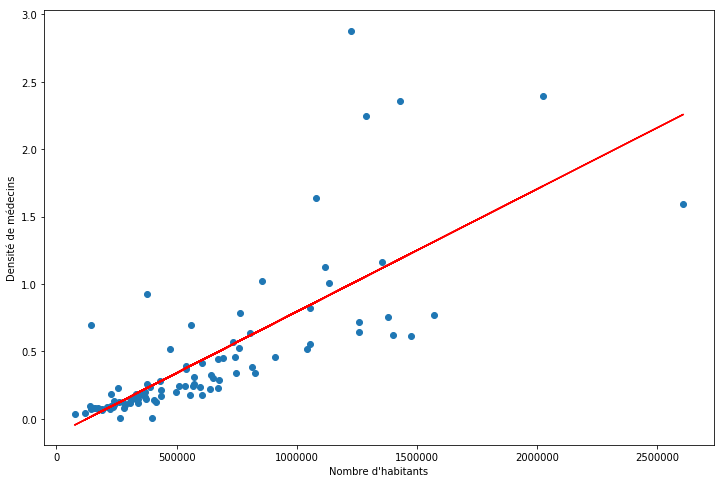

In [62]:
b, m = polyfit(df_dept['Habitant'], df_dept['DensiteMedecins'], 1)
plt.figure(figsize=(12,8))
plt.scatter(df_dept['Habitant'], df_dept['DensiteMedecins'])
plt.plot(df_dept['Habitant'], b + m * df_dept['Habitant'], '-', color='r')
plt.xlabel("Nombre d'habitants")
plt.ylabel("Densité de médecins")
plt.show()

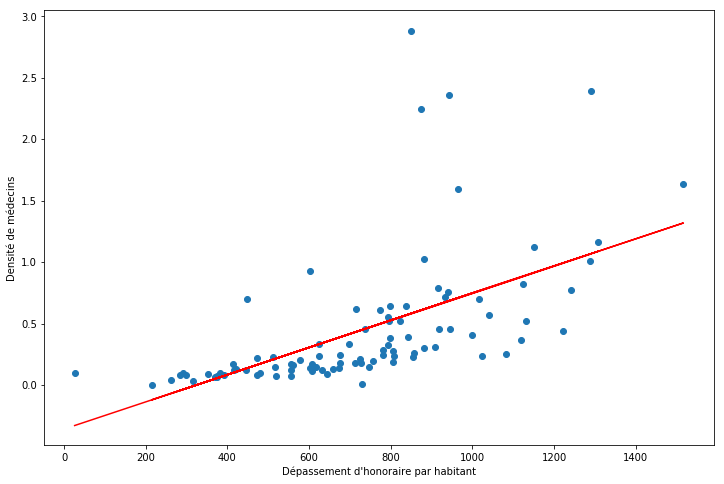

In [63]:
b, m = polyfit(df_dept['Honoraires/Habitant'], df_dept['DensiteMedecins'], 1)
plt.figure(figsize=(12,8))
plt.scatter(df_dept['Honoraires/Habitant'], df_dept['DensiteMedecins'])
plt.plot(df_dept['Honoraires/Habitant'], b + m * df_dept['Honoraires/Habitant'], '-', color='r')
plt.xlabel("Dépassement d'honoraire par habitant")
plt.ylabel("Densité de médecins")
plt.show()